# Astrostats Week 12: Other Methods
Nonnegative matrix factorization and independent component analysis are two other dimensionality reduction approaches that can sometimes do a better job at picking out interesting underlying patterns than PCA. Both of these methods rely on some fundamental assumptions about the domain and source of the data.

## Exercise: Compare "important components" found by NMF and PCA
Due to different constraints on the results, NMF and PCA will return different solutions to a similar matrix factorization problem. Sometimes, NMF can return components with more interesting features patterns than PCA. 

In [2]:
from sklearn.decomposition import PCA, FastICA, NMF 
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Convenient plotting function
def plot_gallery(title, images, n_col=3, n_row=3, cmap='viridis'):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(int(np.sqrt(vec.size)), int(np.sqrt(vec.size))),
            cmap=cmap,
            interpolation="nearest",
            vmin=np.min(images),
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

In [ ]:
# get faces dataset
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=1)
plot_gallery('Some of the faces', faces[:25], n_col=5, n_row=5, cmap='gray')

In [ ]:
# Downsampling faces makes Component patterns easier to see
blocksize = 3

sqfaces = np.reshape(faces, (len(faces), 64, 64))
tmp = np.zeros((len(faces), 48, 48))
data = np.zeros((len(faces), 16,16))
for i in range(len(faces)):
    tmp[i] = sqfaces[i, 8:-8, 8:-8]
    data[i] = block_reduce(tmp[i], block_size=blocksize, func=np.mean)

faces_data = np.reshape(data, (len(faces), 16*16))

plot_gallery('downsampled_faces', data[:25], n_col=5, n_row=5, cmap='gray')

Fit the `faces_data` samples with NMF!

1. Use PCA to determine the best number of components to use in your NMF fit.
<details>
  <summary>Hint 1:</summary>
    Try plotting the the variance and cumulative sum of PCA component variances. `pca.explained_variance_ratio_` gives the ratio of the variance explained by each PC.
</details>

<details>
  <summary>Hint 2:</summary>
    If there aren't any obvious elbow points in the variance plots, you can choose an arbitrary percentage of explained variance (e.g. 90%).
</details>

2. Fit the downsampled faces dataset using NMF and PCA and comapre the important components by plotting them with `plot_gallery`. 

3. Try tuning the number of NMF components to fit. PCA calculates all the orthogonal principle components (limited by the SVD parameters), but NMF results can vary depending on the number of components set.
  

In [ ]:
n_pca = # what is the maximum pca dimensionality?
pca = PCA(n_components=n_pca )
pca_comps = 



In [ ]:
n_nmf = # your code here!
nmf = NMF(n_components=n_nmf, max_iter=1000)
nmf_comps = 

In [ ]:

plot_gallery('NMF components', nmf_comps, n_col=5, n_row=5)


In [ ]:

plot_gallery('pca components', pca_comps, n_row=5, n_col=5)


Try changing the downsampling (or completely removing it) on the Olivetti faces dataset. The NMF components might not pick out the same facial features as components!

You can change the `blocksize` parameter above, or apply dimensionality reduction directly to the `faces` array

In [ ]:
raw_data = faces


In [ ]:
plot_gallery('NMF components', new_nmf_comp, n_col=5, n_row=5, cmap='viridis')

plot_gallery('pca components', new_pca_comp, n_row=5, n_col=5, cmap='viridis')


## Exercise: Unmixing linear combinations of waveforms with ICA
Let's create some sample data from random combinations of a few different waveforms. Use ICA to get the source signals back out of the combined waveforms. How does changing the number of components of the ICA fit affect result? Compare the ICA results to PCA principle components. PCA often performs at least equally as well as ICA.
<details>
  <summary>Hint</summary>
    The `FastICA` implementation from sklearn has the same syntax as `PCA` and `NMF`.
</details>

Repeat the data generation, and both fitting methods a few times. Does ICA perform better on average than PCA? 

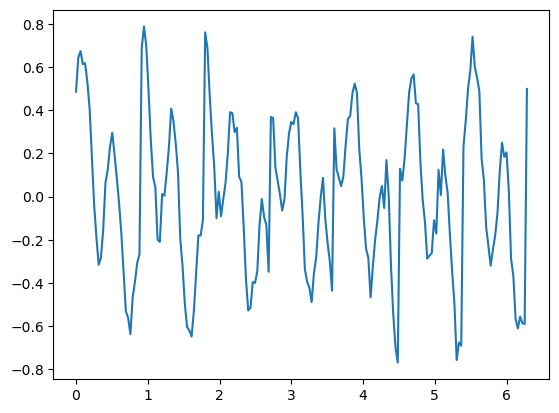

In [3]:
# Generate some source signals
from scipy.signal import sawtooth


t = np.linspace(0, 2*np.pi, 200)
# You can change waveform parameters or add new source signals too!
sine_wave = np.sin(t*15)
saw_wave = -sawtooth(t*7)
tan_wave = np.sin(np.tan(t*4)/20)
noise = np.random.normal(0, 1, (200))

# Make some linear combinations of signals
combination = np.random.uniform(0, 1, (100, 4))
functions_mat = np.stack([sine_wave, saw_wave, noise, tan_wave])
functions_mat.shape
data = (combination @ functions_mat) 
data = data - np.mean(data, axis=0) # data whitening

plt.figure()
plt.title('One of the mixed signals')
plt.plot(t, data[0])
plt.show()

In [ ]:
n_ica = # how many components should you use? 
ica = FastICA(n_components=n_ica, max_iter=1000)


## Exercise: unmixing mistery signals
`mystery.txt` is a dataset containing 100 different combinations of a few characteristic signals. Use any method of your choice from Monday or Wednesday to find the underlying patterns in the data!

<details>
  <summary>Hint:</summary>
    Try running components through IPython.display.Audio, as in `Audio(component, rate=9600)`
</details>
  



In [ ]:
from IPython.display import Audio
dataset = np.load(r'mistery.npy')
print(dataset.shape)

In [ ]:
# Your code here!

signals = 

In [ ]:
Audio(signals[0], rate=9600)